In [37]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import random

In [38]:
the_mobility_data = pd.read_csv('./features/the_mobility.csv').fillna(0)
# 数据预处理
X = the_mobility_data.iloc[:, :22]

y = the_mobility_data.iloc[:, -1]    

In [39]:
importance = np.zeros((22,))
degree = 0.7
for i in range(100):
       random_seed = random.randint(1,100)
       
       random_max_depth = random.randint(2,30)
       random_learning_rate = random.randint(1,100)/100
       random_n_estimators = random.randint(20,100)
      
      ####xgb模型
       xgboost_model = xgb.XGBClassifier(n_estimators=2,max_depth=4,learning_rate=0.08, min_child_weight = 0.01, gamma=0,reg_alpha=0.37,
                                                scale_pos_weight=1)
       xgboost_model.fit(X, y)
       xgb_importance = xgboost_model.feature_importances_
       
       ###随机森林模型
       rf_model = RandomForestClassifier(n_estimators=9, max_depth=1,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=2,
                                  min_impurity_decrease=0.1,random_state=random_seed) 
       rf_model.fit(X,y)
       rf_importance = rf_model.feature_importances_


       ####按照比例累加起来
       importance += degree*xgb_importance + (1-degree)*rf_importance

<class 'numpy.ndarray'>
(22,)


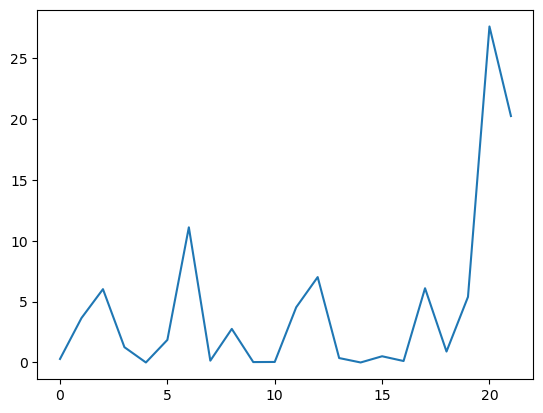

In [40]:
print(type(importance))
print(importance.shape)
plt.plot(importance)

In [41]:
the_index = np.argsort(-importance)
print('重要性从大到小的顺序是',the_index)
print('它们的重要性值是',importance[the_index])


重要性从大到小的顺序是 [20 21  6 12 17  2 19 11  1  8  5  3 18 15 13  0  7 16 10  9  4 14]
它们的重要性值是 [27.61831082 20.25668716 11.11058399  7.01893121  6.10171979  6.02674874
  5.39229728  4.53821429  3.65380952  2.75952381  1.85690476  1.25690476
  0.89940476  0.51071429  0.36369048  0.28936137  0.15        0.12
  0.04285714  0.03333333  0.          0.        ]


In [42]:
importance_df = pd.DataFrame(importance).T
print(importance_df)
importance_df.to_csv('fea_importance/the_movbility_importance.csv')

         0        1         2         3    4         5          6     7   \
0  0.289361  3.65381  6.026749  1.256905  0.0  1.856905  11.110584  0.15   

         8         9   ...        12       13   14        15    16       17  \
0  2.759524  0.033333  ...  7.018931  0.36369  0.0  0.510714  0.12  6.10172   

         18        19         20         21  
0  0.899405  5.392297  27.618311  20.256687  

[1 rows x 22 columns]
